In [1]:
from sklearn import datasets
# ボストンの住宅価格データセットの読み込み
boston = datasets.load_boston()

In [2]:
# データセットの情報を調べる
print(dir(boston)) # ['DESCR', 'data', 'feature_names', 'target']

# bostonデータセットの詳細な説明
# print(boston.DESCR)

['DESCR', 'data', 'feature_names', 'filename', 'target']


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
X = boston.data
y = boston.target

In [6]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_X.columns = boston.feature_names
df_y.columns = ["target"]

In [7]:
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df_y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
df = pd.concat([df_X, df_y], axis = 1)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [12]:
lstat = df_X.loc[:,"LSTAT"]

In [13]:
print("変換前のデータ型は", type(lstat))
print("変換前の配列の大きさは", lstat.shape)
lstat = lstat.values
lstat = lstat.reshape(-1,1)
print("変換後のデータ型は", type(lstat))
print("変換後の配列の大きさは", lstat.shape)

変換前のデータ型は <class 'pandas.core.series.Series'>
変換前の配列の大きさは (506,)
変換後のデータ型は <class 'numpy.ndarray'>
変換後の配列の大きさは (506, 1)


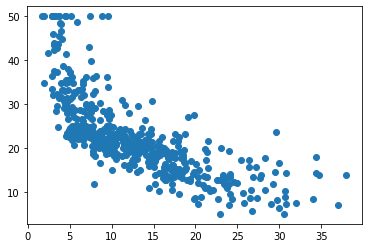

In [14]:
plt.scatter(lstat, y)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lstat, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

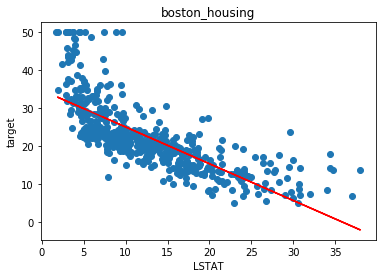

In [18]:
plt.scatter(lstat, y)                       
plt.plot(X_test, lr.predict(X_test), color='red') 
plt.title('boston_housing')     
plt.xlabel('LSTAT')               
plt.ylabel('target')                 
plt.show()                               

# データの分割による性能評価と回帰の評価

In [19]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# 性能評価
from math import sqrt
from sklearn.metrics import mean_squared_error
# 二乗平均平方根誤差(RMSE)を算出
print('RMSE Test :' + str((sqrt(mean_squared_error(y_test, y_test_pred)))))
# 学習用、検証用データに関してR^2を出力 (回帰モデルの場合score()を使うことで決定係数が得られます。)
print('R^2 Train : %.3f, Test : %.3f' % (lr.score(X_train, y_train), lr.score(X_test, y_test)))

RMSE Test :6.310083240714355
R^2 Train : 0.552, Test : 0.522
